# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
# Importar librerías
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Importar datos aquí
df = pd.read_csv("largest_us_retailers.csv")
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


In [ ]:
df.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,23.000000,23.000000,23.000000
mean,71063.080000,3466.565217,36.870966,0.040230
std,125405.727644,4038.708714,40.625277,0.068552
min,16592.000000,231.000000,1.563919,-0.059515
25%,24402.000000,1029.000000,11.263462,-0.001860
50%,34980.000000,1828.000000,25.997733,0.019520
75%,71687.000000,4242.000000,41.358955,0.078934
max,658119.000000,14250.000000,187.795620,0.255662


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             25 non-null     object 
 1   Sales               25 non-null     int64  
 2   Stores              23 non-null     float64
 3   Sales/Avg. Store    23 non-null     float64
 4   Store Count Growth  23 non-null     float64
 5   Category            24 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ KB


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Promedio:47907.22')

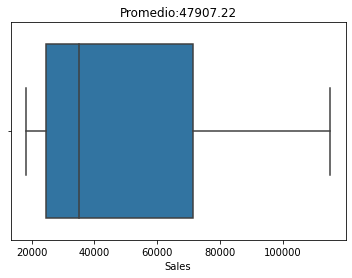

In [ ]:
sns.boxplot(df["Sales"][1:-1])
promedio = str(df["Sales"][1:-1].mean().round(2))


plt.title("Promedio:"+ promedio)




In [ ]:
# sns.histplot(df[1:-1], x="Sales")
# plt.title("La mayoria de la empresas sin contar la numero uno gano entre: 18,201 y 34,340.3")


### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1, 'La mayoria de las compañias gano entre: 16,592 y 48,668.3')

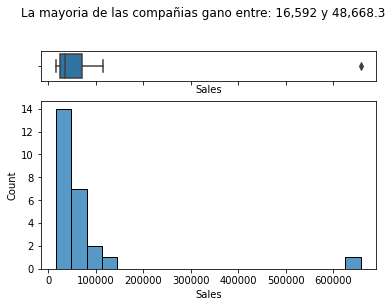

In [ ]:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})


sns.histplot(df, x="Sales", ax=ax_hist)
sns.boxplot(df["Sales"], ax=ax_box)

txt_1 = "La mayoria de las compañias gano entre: 16,592 y 48,668.3"
plt.figtext(0.5, 1, txt_1, wrap=True, horizontalalignment='center', fontsize=12)




### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1, 'La mayoria de las compañias tiene entre: 231 y 2,233 tiendas')

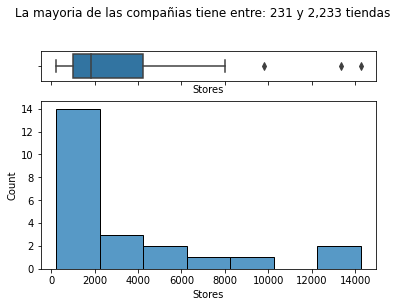

In [ ]:


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
con = sns.histplot(df, x="Stores", ax=ax_hist)
sns.boxplot(df["Stores"], ax=ax_box)

txt_1 = "La mayoria de las compañias tiene entre: 231 y 2,233 tiendas"
plt.figtext(0.5, 1, txt_1, wrap=True, horizontalalignment='center', fontsize=12)



### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

Text(0.5, 1, 'La compañia con mas tiendas no es la numero uno en ventas \n La numero uno en ventas tiene menos de un tercio en comparacion de la que tiene mas tiendas')

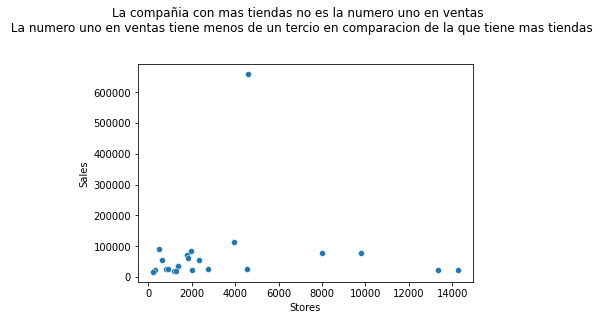

In [ ]:
sns.scatterplot(data=df, x = 'Stores', y = "Sales")
txt = "La compañia con mas tiendas no es la numero uno en ventas \n La numero uno en ventas tiene menos de un tercio en comparacion de la que tiene mas tiendas"
plt.figtext(0.5, 1, txt, wrap=True, horizontalalignment='center', fontsize=12)


### 5. ¿Cuál es el rango que existe entre las ventas?

In [ ]:
max_sales = df["Sales"].max()
min_sales = df["Sales"].min()
range_sales = max_sales - min_sales

print("Ventas maximas:", max_sales)
print("Ventas minimas:", min_sales)
print("Rango entre las venats:", range_sales)


Ventas maximas: 658119
Ventas minimas: 16592
Rango entre las venats: 641527


### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

In [ ]:
more_stores = df.nlargest(5, "Stores")
more_sales = df.nlargest(5, "Sales")
print("Compañias con mas tiendas físicas")
display(more_stores)
print("De las cinco compañias con mas tiendas físicas, solo dos estan entre las que mas ventas tienen")
pd.merge(more_stores,more_sales,on='Company')


Compañias con mas tiendas físicas


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


De las cinco compañias con mas tiendas físicas, solo dos estan entre las que mas ventas tienen


,Company,Sales_x,Stores_x,Sales/Avg. Store_x,Store Count Growth_x,Category_x,Sales_y,Stores_y,Sales/Avg. Store_y,Store Count Growth_y,Category_y
0,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,78924,8002.0,9.810927,-0.010511,Drug Stores
1,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,658119,4574.0,65.649725,0.012843,Supercenters


## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

La categoria con mas ventas es: Supercenters


<AxesSubplot:xlabel='Sales', ylabel='Category'>

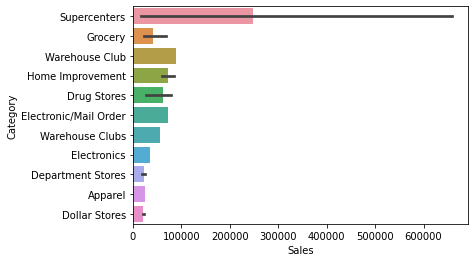

In [ ]:
print("La categoria con mas ventas es: Supercenters")
sns.barplot(data=df, x="Sales", y="Category")

Text(0.5, 1.0, 'Compañias dentro de la categoria Supercenters')

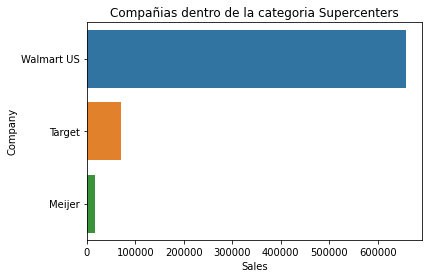

In [ ]:
company_supercenters = df[(df["Category"]=="Supercenters")]
sns.barplot(data=company_supercenters, x="Sales", y="Company")
plt.title("Compañias dentro de la categoria Supercenters", size=12)

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

Text(0.5, 1.0, 'Costco Es la compañia que genera mas ventas por tienda')

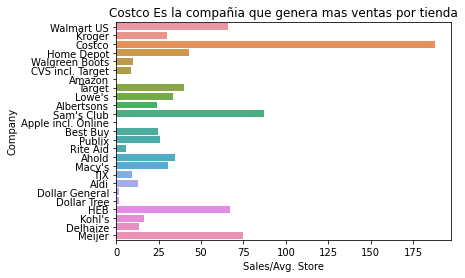

In [ ]:
sns.barplot(data=df, x = 'Sales/Avg. Store' , y="Company")
plt.title("Costco Es la compañia que genera mas ventas por tienda")

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [ ]:
print("Amazon y Apple no cuentan con tiendas fisicas")
print("amazon esta en el lugar numero 7 en ventas")
print("Apple esta en el lugar nuero 12 en ventas")
print("Sus ventas si destacan sobrelas que tienen tiendas físicas")
df[df['Stores'].isnull()]



Amazon y Apple no cuentan con tiendas fisicas
amazon esta en el lugar numero 7 en ventas
Apple esta en el lugar nuero 12 en ventas
Sus ventas si destacan sobrelas que tienen tiendas físicas


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN


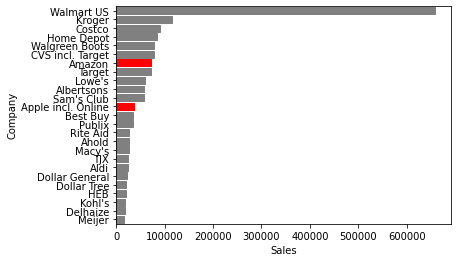

In [ ]:
idx_no_stores =[6, 11]

clrs = ["red" if x in idx_no_stores else "red" for x in df["Company"] ]

ax = sns.barplot(data=df, x="Sales", y="Company")

for bar in ax.patches:
    if bar.get_y().round() in idx_no_stores:
        bar.set_color('red')    
    else:
        bar.set_color('grey')


## III. Tus propias preguntas

### 10. Existe relacion entre numero de tiendas y ventas por tienda?

Text(0.5, 1, 'En la grafrica se puede notar que a en la matoria de las compañias a moyor tiendas tiene menores son sus ventas por tienda')

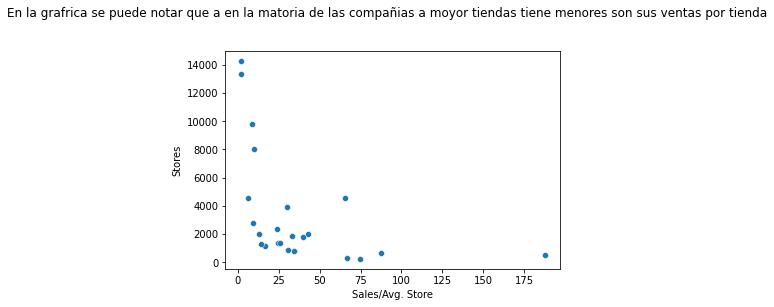

In [ ]:
sns.scatterplot(data=df, x="Sales/Avg. Store", y="Stores")
txt = "En la grafrica se puede notar que a en la matoria de las compañias a moyor tiendas tiene menores son sus ventas por tienda"
plt.figtext(0.5, 1, txt, wrap=True, horizontalalignment='center', fontsize=12)


### 11. Pregunta

'Sales/Avg. Store'

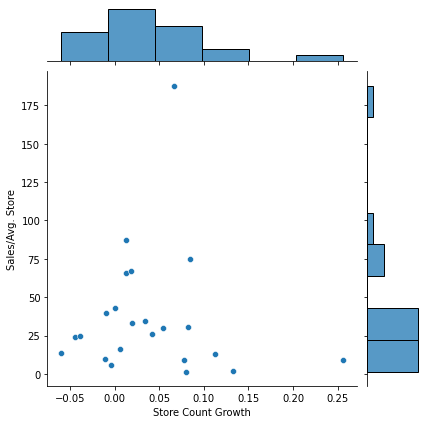

In [ ]:
sns.jointplot(data=df, x="Store Count Growth", y="Sales/Avg. Store")
"Sales/Avg. Store"

### 12. Pregunta

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5b60e449-b5ab-4af6-86e2-b5d192ca743d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>